# Logistic Regression Model using sklearn

In [1]:
# Importing Pandas an Numpy Libraries to use on manipulating our Data
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

import dvc.api
import io

import sys
sys.path.append("../")

from Scripts.modeling_pipeline import run_train_pipeline, get_pipeline


## Steps to get the data

1. Make sure you are in sync with the latest main branch.
2. run `dvc pull` to get the latest data versions
3. In the next cell change the `version` and `path` to access the file you want.

you can find the file names by exploring the data folder.
For the versions, follow this:

 - all files starting with `browser_` can be accessed starting from version=v1.1.1
 - all files starting with `brand_` can be accessed starting from version=v1.1.2
 - you can find the cleaned data with `device_make` converted to `brands` at version=v1.1
 - you can find the cleaned raw data at version=v1
 - you can find the raw data at version=v0
  

The last 3 files have the same name `AdSmartABdata.csv`

In [2]:
def dvc_get_data(path='Data/platform_os_6.csv', version="v3"):
    repo = "../"
    content = dvc.api.read(path=path, 
                        repo=repo, 
                        rev=version)
    df = pd.read_csv(io.StringIO(content), sep=",")

    return df

df = dvc_get_data()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226 entries, 0 to 1225
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   experiment    1226 non-null   object
 1   date          1226 non-null   object
 2   hour          1226 non-null   int64 
 3   device_make   1226 non-null   object
 4   browser       1226 non-null   object
 5   response      1226 non-null   int64 
 6   date_of_week  1226 non-null   object
dtypes: int64(2), object(5)
memory usage: 67.2+ KB


In [3]:
x = df.drop(columns=['response'])
y = df['response'].values



<AxesSubplot:>

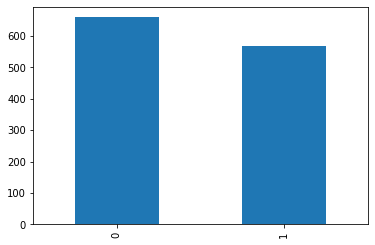

In [4]:
df['response'].value_counts().plot.bar()

In [5]:
model = LogisticRegression(max_iter=1000)


In [6]:
run_train_pipeline(model, x, y, 
                experiment_name='Logistic regression model',
                run_name='first_run')

Successfully registered model 'Logistic regression model_first_run_Sat-May-21-01:16:37-2022'.
2022/05/21 01:16:44 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: Logistic regression model_first_run_Sat-May-21-01:16:37-2022, version 1
Created version '1' of model 'Logistic regression model_first_run_Sat-May-21-01:16:37-2022'.


Run - first_run is logged to Experiment - Logistic regression model


{'accuracy': 0.55, 'precision': 0.51, 'recall': 0.25, 'entropy': 0.69}